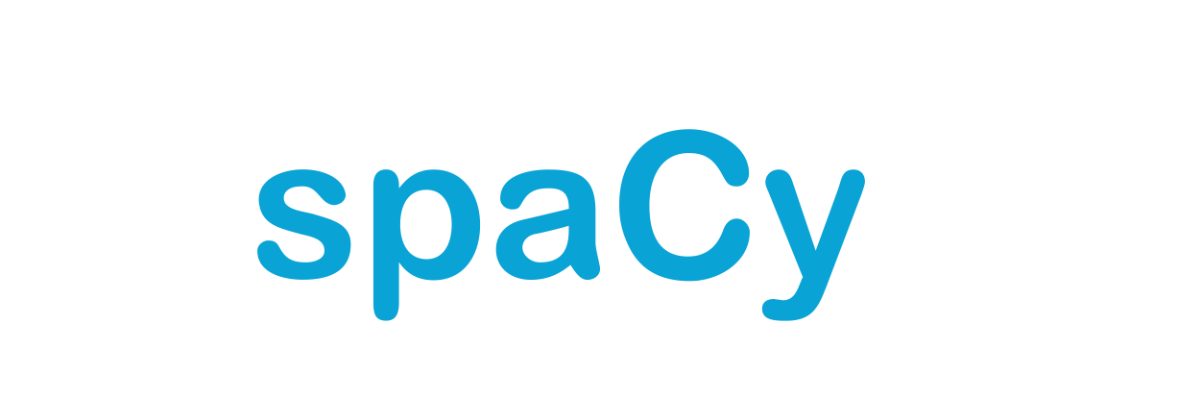

Biblioteca de NLP que já conta com uma série de processamentos automatizados.

### Bibliotecas

In [98]:
import spacy
from spacy import displacy
from spacy.matcher import Matcher
import warnings
import pandas as pd

warnings.filterwarnings('ignore')

***

### Noções Básicas

In [4]:
# Carregando o modelo
nlp = spacy.load('pt_core_news_lg')

In [5]:
# Tipo
print(type(nlp))

<class 'spacy.lang.pt.Portuguese'>


In [6]:
# Pipeline padrão
nlp.pipe_names

['tok2vec', 'morphologizer', 'parser', 'lemmatizer', 'attribute_ruler', 'ner']

- **tok2vec**: Converte tokens em vetores numéricos.
- **morphologizer**: Identifica informações gramaticais dos tokens.
- **parser**: Analisa a estrutura gramatical das frases.
- **attribute_ruler**: Ajusta atributos dos tokens com base em regras.
- **lemmatizer**: Gera os lemmas das palavras.
- **ner**: Reconhecimento de entidades nomeadas.

In [88]:
# Criando o Documento
documento = nlp("Foi com emoção, mas o Botafogo está classificado para as quartas de final da Libertadores e o sonho da conquista inédita da Glória Eterna segue mais do que vivo. O Alvinegro empatou com o Palmeiras em 2 a 2 e avançou na competição.")
documento2 = nlp("Alegações extraordinárias exigem evidências extraordinárias. Carl Sagan: 'https://carlsagan.com'")

In [89]:
# Tamanho do documento
len(documento.vocab)

470

In [90]:
# Tipo
print(type(documento))

<class 'spacy.tokens.doc.Doc'>


No spaCy, os tokens são classificados em hashs únicos, e isso fica armazenado no formulário. E na criação do token, não é apenas realizada a separação das "palavras", mas a identificação se é pontuação, *stop-word*, etc.

In [91]:
for token in documento:
    print(token.text)

Foi
com
emoção
,
mas
o
Botafogo
está
classificado
para
as
quartas
de
final
da
Libertadores
e
o
sonho
da
conquista
inédita
da
Glória
Eterna
segue
mais
do
que
vivo
.
O
Alvinegro
empatou
com
o
Palmeiras
em
2
a
2
e
avançou
na
competição
.


***

### Classificação

In [92]:
# Verificando atributos

print('Tokens: ',[token.text for token in documento],'\n')

print('Stop Word: ',[token.is_stop for token in documento],'\n')

print('Alfa numérico: ',[token.is_alpha for token in documento],'\n')

print('Maiúsculo: ',[token.is_upper for token in documento],'\n')

print('Pontuação: ',[token.is_punct for token in documento],'\n')

print('Número: ',[token.like_num for token in documento],'\n')

print('Sentença Inicial: ',[token.is_sent_start for token in documento],'\n')

Tokens:  ['Foi', 'com', 'emoção', ',', 'mas', 'o', 'Botafogo', 'está', 'classificado', 'para', 'as', 'quartas', 'de', 'final', 'da', 'Libertadores', 'e', 'o', 'sonho', 'da', 'conquista', 'inédita', 'da', 'Glória', 'Eterna', 'segue', 'mais', 'do', 'que', 'vivo', '.', 'O', 'Alvinegro', 'empatou', 'com', 'o', 'Palmeiras', 'em', '2', 'a', '2', 'e', 'avançou', 'na', 'competição', '.'] 

Stop Word:  [True, True, False, False, True, True, False, True, False, True, True, False, True, True, True, False, True, True, False, True, False, False, True, False, False, True, True, True, True, False, False, True, False, False, True, True, False, True, False, True, False, True, False, True, False, False] 

Alfa numérico:  [True, True, True, False, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, False, True, True, True, True, True, True, True, False, True, False, True, True, True, True, False] 

Mai

In [93]:
# Verificando atributos

print('Tokens: ',[token.text for token in documento],'\n')

print('Formato: ',[token.shape_ for token in documento],'\n')

Tokens:  ['Foi', 'com', 'emoção', ',', 'mas', 'o', 'Botafogo', 'está', 'classificado', 'para', 'as', 'quartas', 'de', 'final', 'da', 'Libertadores', 'e', 'o', 'sonho', 'da', 'conquista', 'inédita', 'da', 'Glória', 'Eterna', 'segue', 'mais', 'do', 'que', 'vivo', '.', 'O', 'Alvinegro', 'empatou', 'com', 'o', 'Palmeiras', 'em', '2', 'a', '2', 'e', 'avançou', 'na', 'competição', '.'] 

Formato:  ['Xxx', 'xxx', 'xxxx', ',', 'xxx', 'x', 'Xxxxx', 'xxxx', 'xxxx', 'xxxx', 'xx', 'xxxx', 'xx', 'xxxx', 'xx', 'Xxxxx', 'x', 'x', 'xxxx', 'xx', 'xxxx', 'xxxx', 'xx', 'Xxxxx', 'Xxxxx', 'xxxx', 'xxxx', 'xx', 'xxx', 'xxxx', '.', 'X', 'Xxxxx', 'xxxx', 'xxx', 'x', 'Xxxxx', 'xx', 'd', 'x', 'd', 'x', 'xxxx', 'xx', 'xxxx', '.'] 



In [94]:
# Buscando elementos específicos

for token in documento:
    if token.like_num:
        print(f'Número encontrado: {token.text}')
    if token.is_punct:
        print(f'Pontuação encontrada: {token.text}')

Pontuação encontrada: ,
Pontuação encontrada: .
Número encontrado: 2
Número encontrado: 2
Pontuação encontrada: .


#### Resumo

O spaCy possui diversas formas de categorizar as palavras.

- is_stop: verifica se o token é uma *stop word*

- is_alpha: verifica se o token é baseado em caracteres alfa-numéricos

- is_upper: verifica se o token é composto *apenas* por caractéres maiúsculos

- is_punct: verifica se é pontuação

- like_num: verifica se é um número

- is_sent_start: verifica se é o ínicio de sentença

- shape_ : indicam o padrão de capitalização e de caracteres de cada palavra

***

### Part of Speech

#### Rótulos POS que o spaCy e seus significados:

- ADJ: Adjetivo
- ADP: Preposição ou postposição
- ADV: Advérbio
- AUX: Verbo auxiliar
- CCONJ: Conjunção coordenativa
- DET: Determinante
- NOUN: Substantivo
- NUM: Número
- PART: Partícula
- PRON: Pronome
- PROPN: Nome próprio
- PUNCT: Pontuação
- SCONJ: Conjunção subordinativa
- SYM: Símbolo
- VERB: Verbo
- X: Desconhecido ou não categorizado

In [95]:
# Part of speech

df_pos = pd.DataFrame(columns=['pos_', 'dep_', 'lemma_', 'shape_'])

for token in documento:
    df_pos.loc[token.text] = [token.pos_, token.dep_, token.lemma_, token.shape_]
    
df_pos.head(10)

,pos_,dep_,lemma_,shape_
Foi,SCONJ,cop,foi,Xxx
com,ADP,case,com,xxx
emoção,NOUN,nsubj,emoção,xxxx
",",PUNCT,punct,",",","
mas,CCONJ,cc,mas,xxx
o,DET,det,o,x
Botafogo,PROPN,nsubj,Botafogo,Xxxxx
está,AUX,cop,estar,xxxx
classificado,ADJ,conj,classificado,xxxx
para,ADP,case,para,xxxx


In [96]:
# Classificação morfológica das palacras
for token in documento[0:10]:
    print(token.text, '-' ,token.morph, f'\n')

Foi -  

com -  

emoção - Gender=Fem|Number=Sing 

, -  

mas -  

o - Definite=Def|Gender=Masc|Number=Sing|PronType=Art 

Botafogo - Gender=Masc|Number=Sing 

está - Mood=Ind|Number=Sing|Person=3|Tense=Pres|VerbForm=Fin 

classificado - Gender=Masc|Number=Sing 

para -  



#### Resumo:

- pos_: representa a categoria gramatical do token, como substantivo, verbo, adjetivo, etc.
- dep_: indica a função gramatical do token na frase e como ele se relaciona com outros tokens.
- lemma_: mostra a forma básica ou canônica do token, que é a versão "dicionarizada" da palavra (superior ao stem)
- morph: fornece informações sobre as características gramaticais do token, como gênero, número, etc.

***
### Entidades Nomeadas

principais entidades nomeadas que o spaCy é capaz de identificar:

- PERSON: Pessoas, incluindo nomes próprios.
- NORP: Grupos nacionais, religiosos, políticos (ex: brasileiros, cristãos).
- FAC: Edifícios, aeroportos, rodovias, pontes, etc.
- ORG: Organizações, como empresas, agências governamentais, partidos.
- GPE: Locais geopolíticos, como países, cidades, estados.
- LOC: Locais que não são GPEs, como montanhas, rios, regiões.
- PRODUCT: Objetos, veículos, comidas, etc. (não serviços).
- MISC: Slogan ou expressão que não se encaixa em categorias tradicionais, por isso

In [97]:
# Veridicando entidades nomeadas
for ent in documento.ents:
    print(ent.text, '-', ent.label_)

Botafogo - ORG
Libertadores - MISC
Glória Eterna - PER
Alvinegro - ORG
Palmeiras - ORG


ps. "alvinegro" com minúscula não é identificado como organização, mas "botafogo" e "palmeiras" sim.

***
### Lidando com Stop-words

Stop-words são palavras sem valor semântico, ou, de forma geral palavras vazias. É uma boa prática realizar a retirada dessas palavras.

In [17]:
# Analisando as stop words do texto
for token in documento:
    if token.is_stop:
        print("Stop Word:", token)

Stop Word: Foi
Stop Word: com
Stop Word: mas
Stop Word: o
Stop Word: está
Stop Word: para
Stop Word: as
Stop Word: de
Stop Word: final
Stop Word: da
Stop Word: e
Stop Word: o
Stop Word: da
Stop Word: da
Stop Word: mais
Stop Word: do
Stop Word: que
Stop Word: O
Stop Word: com
Stop Word: o
Stop Word: em
Stop Word: a
Stop Word: e
Stop Word: na


In [18]:
# Texto sem stopwords e pontuacao
texto_sem_stop_word = ' '.join([token.text for token in documento if not token.is_stop and not token.is_punct])

texto_sem_stop_word

'emoção Botafogo classificado quartas Libertadores sonho conquista inédita Glória Eterna segue vivo Alvinegro empatou Palmeiras 2 2 avançou competição'

In [19]:
# Verificando a totalidade das stop words
for words in nlp.Defaults.stop_words:
    print(words)

conhecido
temos
o
sois
tens
tenho
são
favor
for
onde
cá
disso
nove
puderam
tipo
ser
entre
dizer
maior
é
nesta
porém
posso
tanta
terceiro
fora
ademais
comprida
além
dezasseis
saber
tem
ambas
poder
se
talvez
coisa
eu
duas
apontar
estas
seis
grupo
desde
vindo
momento
estou
questão
obrigada
nossas
menor
aqui
custa
possivelmente
após
doze
foi
vos
porquê
naquele
esta
tudo
estás
umas
ligado
teus
nossa
sim
parece
lá
quando
fomos
fez
pôde
apenas
devem
nenhuma
te
porque
ir
sistema
sem
daquela
me
logo
aquele
outra
pontos
relação
vez
tempo
terceira
até
longe
fazes
ambos
maioria
nova
nas
essa
qual
daquele
tanto
quarta
número
dezassete
geral
essas
como
fazem
iniciar
novos
tendes
teve
oitavo
cada
obrigado
meses
próximo
qualquer
corrente
têm
fui
sétima
enquanto
com
nunca
inicio
maiorias
sete
somente
seus
das
estiveste
tal
do
área
primeira
as
comprido
contudo
sabe
uma
quais
final
conhecida
às
nesse
seria
somos
ali
tivemos
podem
tiveram
esteve
aquela
também
vem
fazer
cima
mais
tais
vêm
tivestes
você
dão

In [20]:
# Adicionando stop words (palavra segue)
nlp.Defaults.stop_words.add("segue")
nlp.vocab['segue'].is_stop = True

In [21]:
# Texto sem stopwords e pontuacao (contando com a nova sw)
texto_sem_stop_word = ' '.join([token.text for token in documento if not token.is_stop and not token.is_punct])
print('Texto Original:',documento, f'\n')
print('Texto sem stop words:',texto_sem_stop_word)

Texto Original: Foi com emoção, mas o Botafogo está classificado para as quartas de final da Libertadores e o sonho da conquista inédita da Glória Eterna segue mais do que vivo. O Alvinegro empatou com o Palmeiras em 2 a 2 e avançou na competição. 

Texto sem stop words: emoção Botafogo classificado quartas Libertadores sonho conquista inédita Glória Eterna vivo Alvinegro empatou Palmeiras 2 2 avançou competição


***
### Vocabulário e Lexemmas

Um lexema é a unidade básica de significado de uma palavra, considerada sua forma canônica ou base. É a representação abstrata de uma palavra que pode ter várias formas ou inflexões, mas que compartilha o mesmo núcleo semântico.

no spaCy cada palavra é representada por um Hash.


In [22]:
# Verificando Hash de uma palavra específica
print('Hash:', nlp.vocab.strings['dados'])
print('Hash:', documento.vocab.strings['dados'])
print('String:', documento.vocab.strings[6013848609874238634])

Hash: 6013848609874238634
Hash: 6013848609874238634
String: dados


In [23]:
# Utilidades do Lexemma
lex = nlp.vocab['dados']
print(lex.text, '-', lex.orth, '-', lex.is_alpha, '-', lex.is_lower, '-', lex.is_upper)

dados - 6013848609874238634 - True - True - False


***

### Similaridade

Em spaCy, a similaridade de palavras é dada pelo contexto e não pela similaridade em termos de caracteres entre elas; e para o uso correto da similaridade é necessário o uso do modelo **large** (já instalado).

A similaridade é dada pelo *coseno*, valor entre 0 e 1, se utilizando de uma representação vetorial das palavras, como word embeddings.

In [24]:
# Testando a funcao
documento_t1 = nlp("Ele come carne todos os dias")
documento_t2 = nlp("Ele come vegetais constantemente")
print(documento_t1.similarity(documento_t2))

0.6269032893015234


In [25]:
# Considerando mais palavras iguais
documento_t1 = nlp("Ele come carne todos os dias")
documento_t2 = nlp("Ele come vegetais todos os dias")
print(documento_t1.similarity(documento_t2))

0.9824932425773093


In [26]:
# Alterando (todos os dias para diariamente)
documento_t1 = nlp("Ele come carne todos os dias")
documento_t2 = nlp("Ele come vegetais diariamente")
print(documento_t1.similarity(documento_t2))

0.6432827850989559


In [27]:
# Alterando as palavras de forma a nao fazer sentido
documento_t1 = nlp("Ele come dias os todos carne")
documento_t2 = nlp("Ele come vegetais todos os dias")
print(documento_t1.similarity(documento_t2))

0.982493165246317


In [28]:
# Separando a string
documento_t3 = nlp("Ele pede descrição. Ele pede discrição")
str1 = documento_t3[:3]
str2 = documento_t3[4:]
print(str1.similarity(str2))

0.9630053639411926


***

### Matcher

Identificar padrões dentro de um documento (ou um corpus).

In [29]:
# Inicializando
matcher = Matcher(nlp.vocab)

In [30]:
# Padrao para a identificacao de Telefones
padrao = [{"ORTH": "("}, # parentese de abertura
          {"SHAPE": "dd"}, # DDD (sem o 0)
          {"ORTH": ")"}, # parentese de fechamento
          {"ORTH": "-", "OP": "?"}, # pode vir qualquer texto apos o parentese
          {"IS_DIGIT": True}] # busca digitos

In [31]:
# Adicionando o novo padrao
texto_tel = nlp('Pode ligar no numero (24) 998924213 ou no (21) - 989732934')
matcher.add('telefone', [padrao])

In [32]:
# Encontrando os Matches
matches = matcher(texto_tel)
for id, inicio, fim in matches:
    print(texto_tel[inicio:fim])

(24) 998924213
(21) - 989732934


In [33]:
# Novos testes
texto_tel2 = nlp('Pode ligar no numero (024) 998924213 ou no (41) - 989731423293413')
matcher.add('telefone', [padrao])

In [34]:
# Encontrando os Matches
matches = matcher(texto_tel2)
for id, inicio, fim in matches:
    print(texto_tel2[inicio:fim])

(41) - 989731423293413


Como podemos observar o segundo numero, que possui mais de 9 digitos foi considerado, e o texto onde a pessoa colocou o 0 junto ao ddd não.

Um novo padrão será criado para corrigir esses pontos.

In [35]:
# Inicializando
matcher = Matcher(nlp.vocab)

In [36]:
# Padrao para a identificacao de Telefones
padrao_novo = [{"ORTH": "("}, # parentese de abertura
          {"SHAPE": "dd"}, # DDD (sem o 0)
          {"ORTH": ")"}, # parentese de fechamento
          {"ORTH": "-", "OP": "?"}, # pode vir qualquer texto apos o parentese
          {"IS_DIGIT": True, "LENGTH": 9}] # busca digitos

# Padrao para a identificacao de Telefones
padrao_novo2 = [{"ORTH": "("}, # parentese de abertura
          {"SHAPE": "ddd"}, # DDD (sem o 0)
          {"ORTH": ")"}, # parentese de fechamento
          {"ORTH": "-", "OP": "?"}, # pode vir qualquer texto apos o parentese
          {"IS_DIGIT": True, "LENGTH": 9}] # busca digitos

In [37]:
# Adicionando novo padrao
matcher.add('telefone', [padrao_novo, padrao_novo2])

# Encontrar os matches
matches = matcher(texto_tel2)

In [38]:
# Encontrando os Matches
matches = matcher(texto_tel2)
for id, inicio, fim in matches:
    print(texto_tel2[inicio:fim])

(024) 998924213


Apenas o telefone correto foi considerado.
***
**Novo exemplo**

Dessa vez, buscando dar match em palavras que usualmente são escritas de maneira errada.

In [43]:
# Inicializando
matcher = Matcher(nlp.vocab)

In [44]:
texto_int = nlp('Durante a intervenção realizada ontem, foi discutido o impacto das políticas públicas na melhoria da infraestrutura urbana. O especialista em políticas públicas destacou que a intervencão foi um passo importante para garantir o desenvolvimento sustentável da região com a inter venção. No entanto, a falta de comunicação adequada entre as partes envolvidas levou a algumas críticas sobre a eficácia da intervencao. A equipe responsável já está trabalhando para corrigir esses problemas e assegurar que futuras intervenções sejam mais bem planejadas e executadas.')

In [47]:
# Padrao para a identificacao de palavras escritas de forma diferente
padrao_1 = [{"LOWER": "intervenção"}] 
padrao_2 = [{"LOWER": "intervencao"}]
padrao_3 = [{"LOWER": "intervencão"}]
padrao_4 = [{"LOWER": "intervenções"}]
padrao_5 = [{"LOWER": "inter"},{"LOWER": "venção"}] 

# Adicionando novo padrao
matcher.add('padrao', [padrao_1,padrao_2,padrao_3,padrao_4,padrao_5])

In [48]:
# Encontrar os matches
matches = matcher(texto_int)

# Encontrando os Matches
matches = matcher(texto_int)
for id, inicio, fim in matches:
    print(texto_int[inicio:fim])

intervenção
intervencão
inter venção
intervencao
intervenções


***

### Displacy 

Visualizações com o spaCy.

In [100]:
# Testando displacy (entidades nomeadas)
displacy.render(documento, style="ent", jupyter=True)

Todas as entidades nomeadas foram identificadas.

In [114]:
# Testando displacy (identificando dependencias)
displacy.render(documento, style="dep", jupyter=True, options={'compact': True,
                                                               'distance':100})

***
### Gerenciando Pipelines

No spaCy, ao se criar um "documento" *nlp*, um *doc* é criado, que produz um pipeline padrão, porém, esse pipeline pode ser alterado, seja adicionando ou removendo etapas.

#### Etapa Inicial:

- **tokenizer**: Essa etapa sequer chega a ser padrão, ela é automática, quando o método e chamado.

#### Etapas Padrão:


In [120]:
# Etapas (Fora de ordem)
pd.Series(nlp.pipe_names).T

0            tok2vec
1      morphologizer
2             parser
3         lemmatizer
4    attribute_ruler
5                ner
dtype: object

In [122]:
# Retirando etapas
nlp.remove_pipe('tok2vec')
pd.Series(nlp.pipe_names).T

0      morphologizer
1             parser
2         lemmatizer
3    attribute_ruler
4                ner
dtype: object

In [124]:
# Adicionando etapas
nlp.add_pipe('tok2vec', after='morphologizer')
pd.Series(nlp.pipe_names).T

0      morphologizer
1            tok2vec
2             parser
3         lemmatizer
4    attribute_ruler
5                ner
dtype: object

A etapa foi adicionada novamente